In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
plt.style.use('fivethirtyeight')

In [2]:
traffic = pd.read_csv('train_revised_11.09.2018/train_revised.csv')
traffic.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [3]:
t = traffic[['ride_id', 'travel_date', 'travel_time','travel_from', 'car_type', 'max_capacity']]

In [4]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 6 columns):
ride_id         51645 non-null int64
travel_date     51645 non-null object
travel_time     51645 non-null object
travel_from     51645 non-null object
car_type        51645 non-null object
max_capacity    51645 non-null int64
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [5]:
t.dtypes

ride_id          int64
travel_date     object
travel_time     object
travel_from     object
car_type        object
max_capacity     int64
dtype: object

In [6]:
t.describe(include='all')

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645.000000
unique,NaN,149,78,17,2,NaN
top,NaN,10-12-17,7:09,Kisii,Bus,NaN
freq,NaN,856,3926,22607,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,49.000000


In [7]:
t.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity
0,1442,17-10-17,7:15,Migori,Bus,49
1,5437,19-11-17,7:12,Migori,Bus,49
2,5710,26-11-17,7:05,Keroka,Bus,49
3,5777,27-11-17,7:10,Homa Bay,Bus,49
4,5778,27-11-17,7:12,Migori,Bus,49


Here I wanted to have a look at the fields that had 2 unique values. 

In [8]:
print(t['car_type'].value_counts())
print(t['max_capacity'].value_counts())

Bus        31985
shuttle    19660
Name: car_type, dtype: int64
49    31985
11    19660
Name: max_capacity, dtype: int64


So if you look at the describe cell above you'll find something curious with the travel times. Despite the fact that there over 6249 trips, and there's only 78 unquie times, graphed below. Looking at the values, majority of the first 10 are in the morning at 7, tells me that I would make sense to simplify this field to an hour field instead.

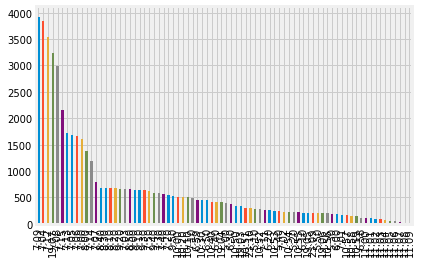

In [9]:
t['travel_time'].value_counts().plot.bar()

In [10]:
t['travel_time'].value_counts()

7:09     3926
7:04     3837
7:12     3540
19:07    3227
7:08     2989
7:15     2146
7:13     1724
7:05     1675
7:06     1661
7:00     1603
8:00     1373
7:14     1181
7:07      784
8:40      673
8:30      672
8:10      671
8:20      670
9:20      660
7:03      656
8:50      650
9:00      647
9:10      646
9:30      630
7:50      628
9:40      589
7:30      582
7:40      571
7:20      549
9:50      520
10:00     506
         ... 
6:20      250
10:53     238
5:40      236
7:02      230
10:54     226
5:20      221
10:55     218
6:10      210
19:05     207
23:09     204
5:50      204
19:06     199
10:56     196
5:30      189
6:00      186
7:01      173
10:57     163
10:58     148
10:59     145
6:58      111
11:00     110
11:01     104
11:02      92
11:03      80
11:04      76
11:05      51
11:06      48
11:07      32
11:08      18
11:09       9
Name: travel_time, Length: 78, dtype: int64

Creating the new variable. I'm just going to call it hour_booked

In [11]:
t['hour_booked'] = pd.to_numeric(t['travel_time'].str.extract(r'(^\d*)').loc[:,0])

/home/princelysid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
t.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,hour_booked
0,1442,17-10-17,7:15,Migori,Bus,49,7
1,5437,19-11-17,7:12,Migori,Bus,49,7
2,5710,26-11-17,7:05,Keroka,Bus,49,7
3,5777,27-11-17,7:10,Homa Bay,Bus,49,7
4,5778,27-11-17,7:12,Migori,Bus,49,7


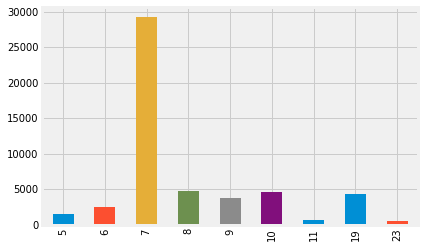

In [13]:
t['hour_booked'].value_counts().sort_index().plot.bar()

In [14]:
((t['hour_booked'].value_counts()/t['hour_booked'].value_counts().sum())*100).sort_index()

5      2.933488
6      4.720689
7     56.549521
8      9.118017
9      7.148804
10     8.916642
11     1.200503
19     8.459677
23     0.952658
Name: hour_booked, dtype: float64

Wow that's most people booking tickets at 7 am. Over 55%. I'm thinking that I might change this into a categorical variable when I do my models. 

Next I think we can look at dates. We have 149 days, let's make that field more configurable

In [15]:
t.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,hour_booked
0,1442,17-10-17,7:15,Migori,Bus,49,7
1,5437,19-11-17,7:12,Migori,Bus,49,7
2,5710,26-11-17,7:05,Keroka,Bus,49,7
3,5777,27-11-17,7:10,Homa Bay,Bus,49,7
4,5778,27-11-17,7:12,Migori,Bus,49,7


In [16]:
t['travel_date'] = pd.to_datetime(t['travel_date'])

/home/princelysid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


So first I looked at the year assuming they came from same year but that would have been a mistakes at the data is from over 2017, 2018. Also the busiest months are the end of the year and the beginning. Added variable for month/year for further exploration.

In [17]:
t['m_y'] = t['travel_date'].dt.strftime('%Y-%m')
t['day'] = t['travel_date'].dt.strftime('%w')

/home/princelysid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/princelysid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


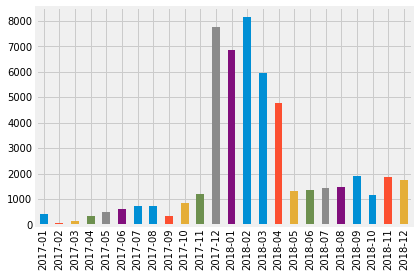

In [18]:
t['m_y'].value_counts().sort_index().plot.bar()

So it seems that for a lot of months in 2017, bookings were made on single days. That might be a problem. Given that the test data for this is for 2018. We'll have to keep an eye on whether removing those months makes sense. I'd say some of this is an articially made dataset.

In [19]:
for x in t['m_y'].value_counts().sort_index().index:
    print('For month: {}'.format(x))
    print(t[t['m_y']==x]['day'].value_counts().shape)

For month: 2017-01
(1,)
For month: 2017-02
(1,)
For month: 2017-03
(1,)
For month: 2017-04
(1,)
For month: 2017-05
(1,)
For month: 2017-06
(1,)
For month: 2017-07
(1,)
For month: 2017-08
(1,)
For month: 2017-09
(1,)
For month: 2017-10
(2,)
For month: 2017-11
(5,)
For month: 2017-12
(7,)
For month: 2018-01
(7,)
For month: 2018-02
(7,)
For month: 2018-03
(7,)
For month: 2018-04
(7,)
For month: 2018-05
(4,)
For month: 2018-06
(4,)
For month: 2018-07
(4,)
For month: 2018-08
(4,)
For month: 2018-09
(4,)
For month: 2018-10
(4,)
For month: 2018-11
(4,)
For month: 2018-12
(4,)


In [20]:
t.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,hour_booked,m_y,day
0,1442,2017-10-17,7:15,Migori,Bus,49,7,2017-10,2
1,5437,2017-11-19,7:12,Migori,Bus,49,7,2017-11,0
2,5710,2017-11-26,7:05,Keroka,Bus,49,7,2017-11,0
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,7,2017-11,1
4,5778,2017-11-27,7:12,Migori,Bus,49,7,2017-11,1


Let's seperate the dataset based on the car type

In [21]:
b = t[t['car_type']=='Bus']
s = t[t['car_type']=='shuttle']

So let's see how often buses travel without filling.

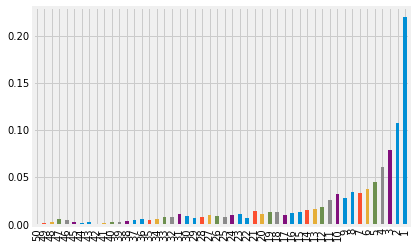

In [22]:
(b['ride_id'].value_counts().value_counts().sort_index(ascending=False)/b['ride_id'].value_counts().value_counts().sort_index(ascending=False).sum()).plot.bar()

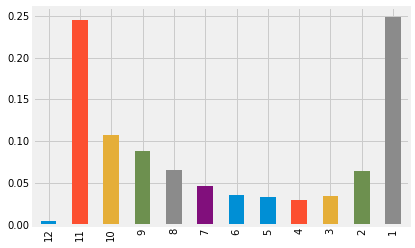

In [23]:
(s['ride_id'].value_counts().value_counts().sort_index(ascending=False)/s['ride_id'].value_counts().value_counts().sort_index(ascending=False).sum()).plot.bar()

Looks like a lot of the buses are leaving with only a few passengers. This tells me that they're not only using this platform to book people. Either that or this dataset is not complete or artificially made. Anyway lemme continue exploring the hypothesis I was looking at before this happened. What times is a driver likely to leave without filling his ride.

In [24]:
b.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,hour_booked,m_y,day
0,1442,2017-10-17,7:15,Migori,Bus,49,7,2017-10,2
1,5437,2017-11-19,7:12,Migori,Bus,49,7,2017-11,0
2,5710,2017-11-26,7:05,Keroka,Bus,49,7,2017-11,0
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,7,2017-11,1
4,5778,2017-11-27,7:12,Migori,Bus,49,7,2017-11,1


In [25]:
bpf = (b['ride_id'].value_counts()/49).round(2)
spf = (s['ride_id'].value_counts()/11).round(2)


In [26]:
for x in bpf.index:
    b.loc[b['ride_id'].isin([x]), 'p_filled'] = bpf[x]

1.02
1.0
1.0


/home/princelysid/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/princelysid/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1.0
1.0
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.94
0.94
0.94
0.94
0.94
0.94
0.94
0.94
0.94
0.94
0.94
0.94
0.94
0.94
0.92
0.92
0.92
0.92
0.92
0.92
0.92
0.9
0.9
0.9
0.9
0.88
0.88
0.88
0.88
0.88
0.88
0.88
0.88
0.88
0.86
0.86
0.86
0.84
0.84
0.84
0.84
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.82
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.78
0.78
0.78
0.78
0.78
0.78
0.78
0.78
0.78
0.78
0.78
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.73
0.71
0.71
0.71
0.71
0.71
0.71
0.71
0.71
0.71
0.71
0.71
0.71
0.71
0.71
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.69
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.67
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65

0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.08
0.0

In [27]:
b.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,hour_booked,m_y,day,p_filled
0,1442,2017-10-17,7:15,Migori,Bus,49,7,2017-10,2,0.02
1,5437,2017-11-19,7:12,Migori,Bus,49,7,2017-11,0,0.02
2,5710,2017-11-26,7:05,Keroka,Bus,49,7,2017-11,0,0.02
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,7,2017-11,1,0.10
4,5778,2017-11-27,7:12,Migori,Bus,49,7,2017-11,1,0.63


In [28]:
for x in spf.index:
    s.loc[s['ride_id'].isin([x]), 'p_filled'] = spf[x]

1.09
1.09
1.09
1.09


/home/princelysid/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/princelysid/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1.09
1.09
1.09
1.09
1.09
1.09
1.09
1.09
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.55
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.45
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36
0.36


In [29]:
s.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,hour_booked,m_y,day,p_filled
12,5784,2018-04-20,5:10,Kisii,shuttle,11,5,2018-04,5,0.09
13,5789,2018-04-20,9:50,Kisii,shuttle,11,9,2018-04,5,0.09
16,5791,2018-04-20,6:00,Kisii,shuttle,11,6,2018-04,5,0.09
17,5792,2018-04-20,5:50,Kisii,shuttle,11,5,2018-04,5,0.09
18,5793,2018-04-20,10:58,Kisii,shuttle,11,10,2018-04,5,0.09


In [30]:
s['hour_booked'].value_counts().sort_index().index

Int64Index([5, 6, 7, 8, 9, 10, 11], dtype='int64')

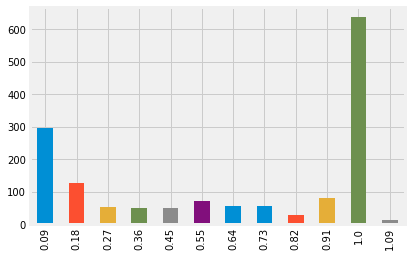

In [31]:
s[s['hour_booked']==5]['p_filled'].value_counts().sort_index().plot.bar()

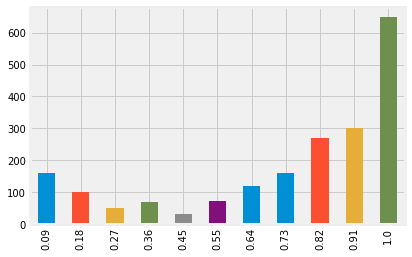

In [32]:
s[s['hour_booked']==6]['p_filled'].value_counts().sort_index().plot.bar()

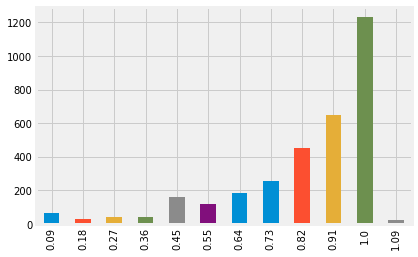

In [33]:
s[s['hour_booked']==7]['p_filled'].value_counts().sort_index().plot.bar()

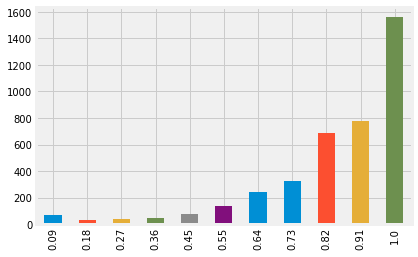

In [34]:
s[s['hour_booked']==8]['p_filled'].value_counts().sort_index().plot.bar()

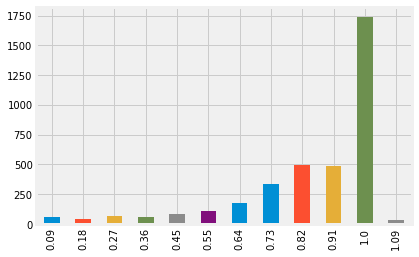

In [35]:
s[s['hour_booked']==9]['p_filled'].value_counts().sort_index().plot.bar()

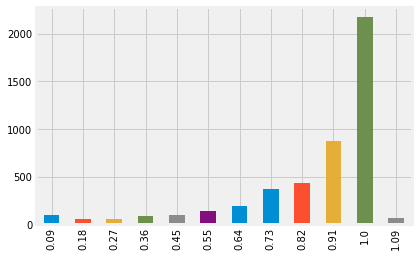

In [36]:
s[s['hour_booked']==10]['p_filled'].value_counts().sort_index().plot.bar()

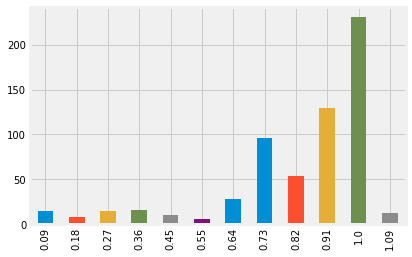

In [37]:
s[s['hour_booked']==11]['p_filled'].value_counts().sort_index().plot.bar()

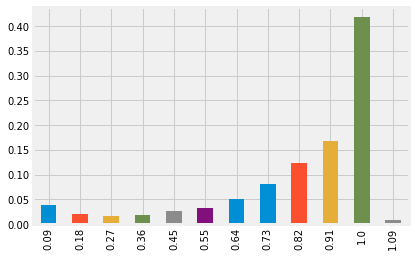

In [42]:
(s['p_filled'].value_counts().sort_index()/s['p_filled'].value_counts().sum()).plot.bar()

So from these plots you can see that shuttle drivers are more likely to leave the closer their rides get to filled(exponentially), this could be used to come up with a real time prediction system one day. Let's look at the larger buses

In [39]:
n = s[['hour_booked','p_filled']]

In [ ]:
n

In [46]:
for x in s['hour_booked'].value_counts().sort_index().index:
    print(s[s['hour_booked']==x]['p_filled'].mean())

0.6380039656311963
0.7372387682988389
0.8296432964329643
0.8449286965223919
0.8492795232936079
0.8592486427795875
0.8305967741935484


In [47]:
b['hour_booked'].value_counts().sort_index().index

Int64Index([5, 6, 7, 8, 19, 23], dtype='int64')

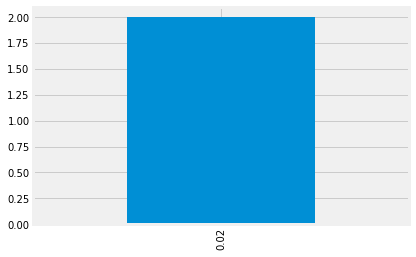

In [49]:
b[b['hour_booked']==5]['p_filled'].value_counts().sort_index().plot.bar()

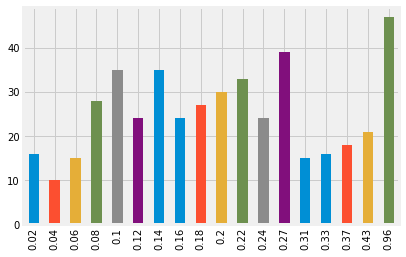

In [52]:
b[b['hour_booked']==6]['p_filled'].value_counts().sort_index().plot.bar()

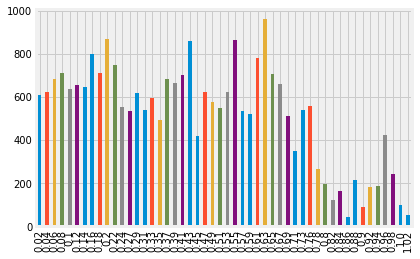

In [54]:
b[b['hour_booked']==7]['p_filled'].value_counts().sort_index().plot.bar()

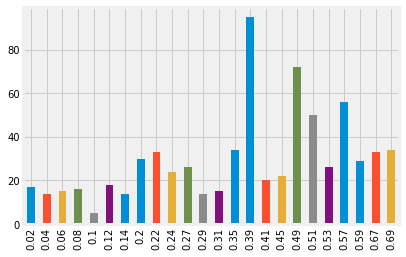

In [55]:
b[b['hour_booked']==8]['p_filled'].value_counts().sort_index().plot.bar()

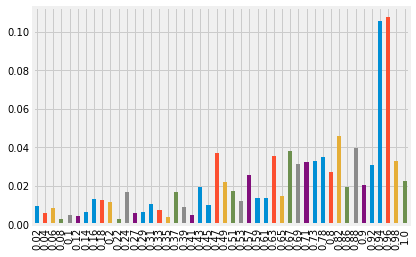

In [58]:
(b[b['hour_booked']==19]['p_filled'].value_counts().sort_index()/b[b['hour_booked']==19]['p_filled'].value_counts().sum()).plot.bar()

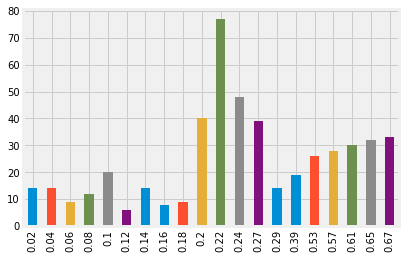

In [57]:
b[b['hour_booked']==23]['p_filled'].value_counts().sort_index().plot.bar()

It seems that bus drivers are less concern about filling their rides before they leave

The first time I went through this data set I spent so much time looking at the seats only to realise that the test set did not have any data on that. Also it doesn't have payment method either. Sigh, that's a whole morning gone. Always remember to look at the client brief people.